# Import libraries

In [81]:
# Pandas library is used for handling tabular data
import pandas as pd

# NumPy is used for handling numerical series operations (addition, multiplication, and ...)
import numpy as np
# Sklearn library contains all the machine learning packages we need to digest and extract patterns from the data
from sklearn import linear_model, model_selection, metrics
from sklearn.model_selection import train_test_split

# Machine learning libraries used to build a decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Sklearn's preprocessing library is used for processing and cleaning the data 
from sklearn import preprocessing

# for visualizing the tree
import pydotplus
from IPython.display import Image
import seaborn as sns

# Read The Data

In [82]:
data = pd.read_excel('Dataset.xlsx')
data.head()

Ongata Rongai to Karen to Embakasi then back to Karen then Ongata Rongai  \
0                                                NaN                          
1                                                NaN                          
2                                                1.0                          
3                                                2.0                          
4                                                3.0                          

  Unnamed: 1 Unnamed: 2 Unnamed: 3    Unnamed: 4 Unnamed: 5    Unnamed: 6  \
0        NaN        NaN        NaN           NaN        NaN           NaN   
1   Reg. No.       Lat         Lon  Speed (km/h)  Altitude   EngineState    
2        KXX  -1.391675  36.776489             0     1711.3             0   
3        KXX  -1.391668  36.776497             2       1717          1800   
4        KXX  -1.391628  36.776451             3     1716.8          1800   

  Unnamed: 7                 Unnamed: 8           Unnamed: 9 Unnamed: 10  \
0        NaN                        NaN                  NaN         NaN   
1  Direction  Direction (Angle Changes)                Time      GPSTime   
2         SW                        194  2018-05-16 08:25:58  1526444758   
3         NW                        299  2018-05-16 08:32:08  1526445128   
4         NW                        348  2018-05-16 08:32:17  1526445137   

           Unnamed: 11  Unnamed: 12            Unnamed: 13  \
0                  NaN          NaN                    NaN   
1  GPS Signal Strength  Speed (m/s)  Change in Speed (m/s)   
2                  0.8            0                    NaN   
3                  0.8         0.56                   0.56   
4                  0.8         0.83                   0.27   

           Unnamed: 14         Unnamed: 15         Unnamed: 16  \
0                  NaN                 NaN                 NaN   
1  Change in Direction  Change in Altitude  Change in Time (s)   
2                  NaN                 NaN                 NaN   
3                  105                 5.7                 370   
4                   49                -0.2                   9   

                        Unnamed: 17  
0                               NaN  
1  Acceleration/Deceleration (m/s2)  
2                               NaN  
3                                 0  
4                              0.03

In [83]:
# Repair the columns
# delete first two rows
data = pd.read_excel('Dataset.xlsx', skiprows=2)
# drop first column
data = data.drop(data.columns[0], axis=1)
data.head()

Reg. No.      Lat         Lon  Speed (km/h)  Altitude   EngineState   \
0      KXX -1.391675  36.776489             0     1711.3             0   
1      KXX -1.391668  36.776497             2     1717.0          1800   
2      KXX -1.391628  36.776451             3     1716.8          1800   
3      KXX -1.391628  36.776451             2     1716.1          1800   
4      KXX -1.391848  36.776340             6     1712.5          1800   

  Direction  Direction (Angle Changes)               Time      GPSTime  \
0        SW                        194 2018-05-16 08:25:58  1526444758   
1        NW                        299 2018-05-16 08:32:08  1526445128   
2        NW                        348 2018-05-16 08:32:17  1526445137   
3        SE                        170 2018-05-16 08:32:22  1526445142   
4        SW                        231 2018-05-16 08:32:55  1526445175   

   GPS Signal Strength  Speed (m/s)  Change in Speed (m/s)  \
0                  0.8         0.00                    NaN   
1                  0.8         0.56                   0.56   
2                  0.8         0.83                   0.27   
3                  0.8         0.56                  -0.27   
4                  0.8         1.67                   1.11   

   Change in Direction  Change in Altitude  Change in Time (s)  \
0                  NaN                 NaN                 NaN   
1                105.0                 5.7               370.0   
2                 49.0                -0.2                 9.0   
3               -178.0                -0.7                 5.0   
4                 61.0                -3.6                33.0   

   Acceleration/Deceleration (m/s2)  
0                               NaN  
1                              0.00  
2                              0.03  
3                             -0.05  
4                              0.03

# Explore The Data

In [84]:
# get type of data in columns
data.dtypes


Reg. No.                                    object
Lat                                        float64
Lon                                        float64
Speed (km/h)                                 int64
Altitude                                   float64
EngineState                                  int64
Direction                                   object
Direction (Angle Changes)                    int64
Time                                datetime64[ns]
GPSTime                                      int64
GPS Signal Strength                        float64
Speed (m/s)                                float64
Change in Speed (m/s)                      float64
Change in Direction                        float64
Change in Altitude                         float64
Change in Time (s)                         float64
Acceleration/Deceleration (m/s2)           float64
dtype: object

# Data Cleaning

In [85]:
print(data.columns.tolist())

['Reg. No.', 'Lat ', 'Lon', 'Speed (km/h)', 'Altitude ', 'EngineState ', 'Direction', 'Direction (Angle Changes)', 'Time ', 'GPSTime', 'GPS Signal Strength', 'Speed (m/s)', 'Change in Speed (m/s)', 'Change in Direction', 'Change in Altitude', 'Change in Time (s)', 'Acceleration/Deceleration (m/s2)']


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Reg. No.                          1001 non-null   object        
 1   Lat                               1001 non-null   float64       
 2   Lon                               1001 non-null   float64       
 3   Speed (km/h)                      1001 non-null   int64         
 4   Altitude                          1001 non-null   float64       
 5   EngineState                       1001 non-null   int64         
 6   Direction                         1001 non-null   object        
 7   Direction (Angle Changes)         1001 non-null   int64         
 8   Time                              1001 non-null   datetime64[ns]
 9   GPSTime                           1001 non-null   int64         
 10  GPS Signal Strength               1001 non-null 

In [87]:
# get  time column 
# notice the time column name has a space ahead of it data['Time ']
data['Time ']



0      2018-05-16 08:25:58
1      2018-05-16 08:32:08
2      2018-05-16 08:32:17
3      2018-05-16 08:32:22
4      2018-05-16 08:32:55
               ...        
996    2018-05-16 06:57:33
997    2018-05-16 06:57:41
998    2018-05-16 06:58:06
999    2018-05-16 06:58:20
1000   2018-05-16 07:07:18
Name: Time , Length: 1001, dtype: datetime64[ns]

In [88]:
#get the hour: minute: second
data['exact_time'] = (data['Time '].dt.time)

print(data['exact_time'])

0       08:25:58
1       08:32:08
2       08:32:17
3       08:32:22
4       08:32:55
          ...   
996     06:57:33
997     06:57:41
998     06:58:06
999     06:58:20
1000    07:07:18
Name: exact_time, Length: 1001, dtype: object


<AxesSubplot:xlabel='Speed (km/h)'>

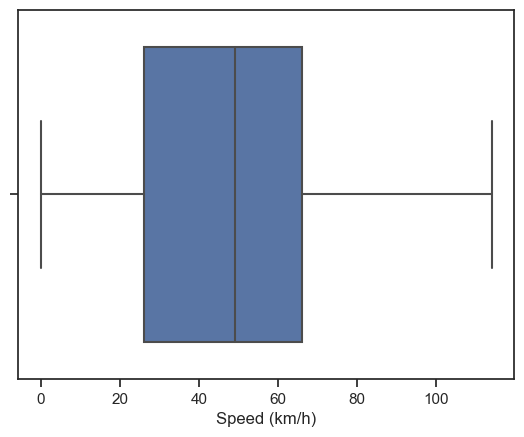

In [89]:
# remove outliers in the speed column
sns.boxplot(x = data['Speed (km/h)'])


# Data Manipulation

In [90]:
# we now need to group some of the items 
# i. new column Speed Level into low, normal, high
data['Speed Level'] = pd.cut(data['Speed (km/h)'], bins=[-1,25,65,66 ], labels=['low', 'normal', 'high'])
# show the new column against the old data['Speed (km/h)']
# data[['Speed (km/h)', 'Speed Level']] 
data['Speed (km/h)'].unique()



array([  0,   2,   3,   6,  24,  31,  29,   7,  34,  36,  38,  37,  21,
        22,  33,   4,  12,  14,  18,  41,  46,  49,  44,  43,  35,  30,
        39,  42,  27,  48,  51,  45,  32,  23,  52,  50,  57,  55,  60,
        62,  56,  10,  54,  58,  28,  67,  71,  74,  76,  78,  86,  82,
        64,  17,  26,  11,  81,  80,  85,  88,  91,  87,  98,  96,  79,
        77, 105, 103,  99,  90,  84,  93,  94,  97,  89,  61,  69,  72,
        70,  68,  65,  66,  63,  73,  59,  83,  75,  53,  92,  13,  40,
        15,   1,   9,   5,  19,  47,  16,  20,   8,  25, 100, 101, 104,
       109, 110, 111, 112, 113, 114, 107, 102, 106, 108], dtype=int64)

In [91]:
# ii. new column of altitude change into negative, zero, positive
# bin the data with four bins and three labels negative for negative values , zero for 0 values, positive for values greater than 0
data['Altitude Change_level'] = pd.cut(data['Change in Altitude'], bins=[-100000, -0.000000001, 0, 100000], labels=['negative', 'zero', 'positive'])   
data[['Change in Altitude', 'Altitude Change_level']]

Change in Altitude Altitude Change_level
0                    NaN                   NaN
1                    5.7              positive
2                   -0.2              negative
3                   -0.7              negative
4                   -3.6              negative
...                  ...                   ...
996                 -0.8              negative
997                 -1.0              negative
998                 -2.9              negative
999                  1.0              positive
1000                -3.3              negative

[1001 rows x 2 columns]

In [92]:
# iii. new column of speed change into negative, zero, positive
data['Speed Change'] = pd.cut(data['Change in Speed (m/s)'], bins=[-100000, -0.000000001, 0, 100000], labels=['negative', 'zero', 'positive'])
# show the new column against the old data['Speed (km/h)']
data[['Change in Speed (m/s)', 'Speed Change']]

Change in Speed (m/s) Speed Change
0                       NaN          NaN
1                      0.56     positive
2                      0.27     positive
3                     -0.27     negative
4                      1.11     positive
...                     ...          ...
996                    0.00         zero
997                   -3.61     negative
998                   -2.22     negative
999                    4.44     positive
1000                  -7.50     negative

[1001 rows x 2 columns]

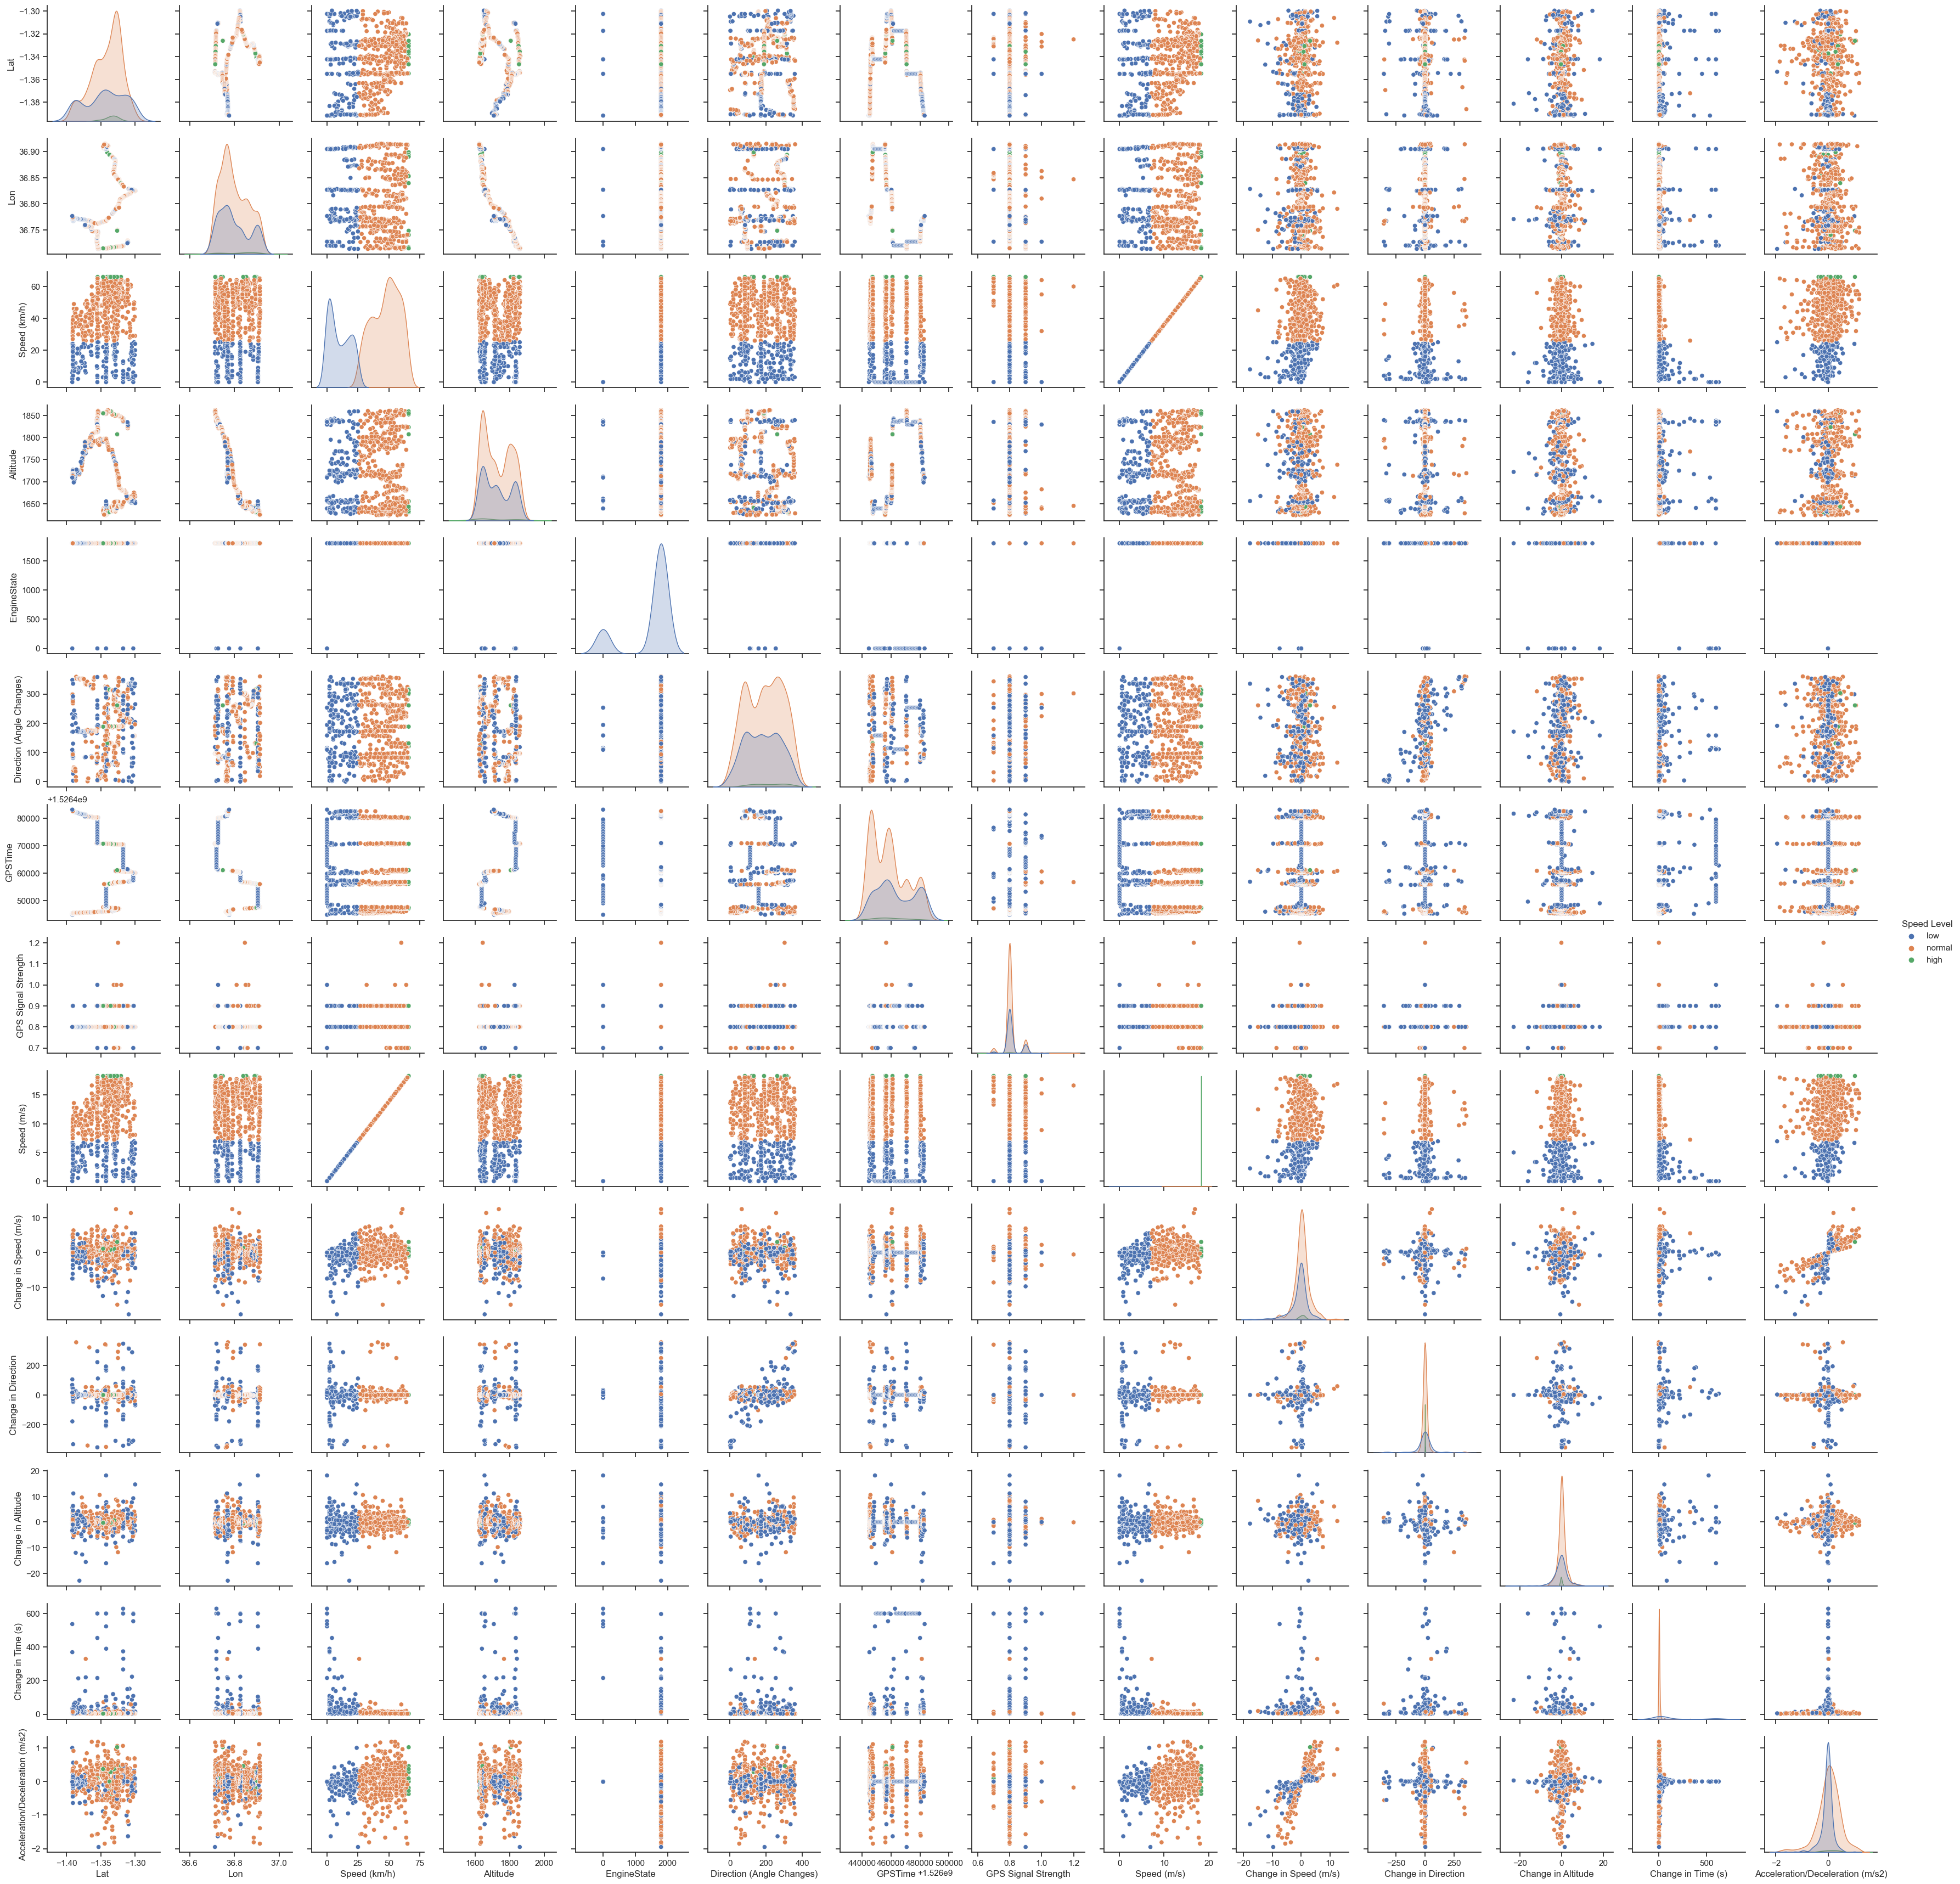

In [93]:
# visualize the data in clusters
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, hue="Speed Level")
plt.show()



In [94]:
# check if dataset has missing values 
data['Lat '].isnull().any().any()



False

In [95]:
data['Lon'].isnull().any().any()

False

In [96]:
data['Speed Level'].isnull().any().any()


True

In [97]:
#replace the null value with zero


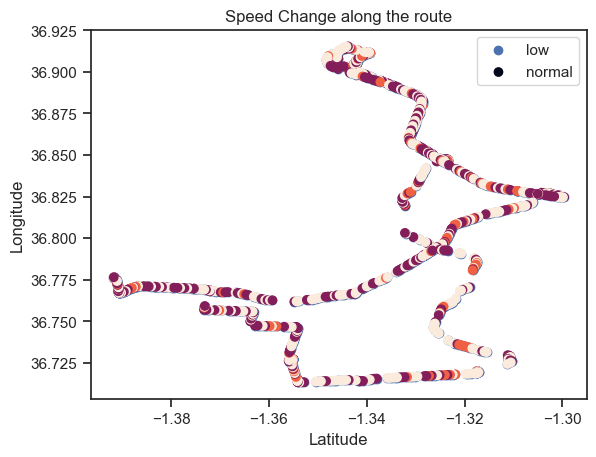

In [98]:
#plot latitude and longitude
plt.scatter(data['Lat '], data['Lon'])
# data
# plot the speed change clusters in different colors define the colors

plt.scatter(data['Lat '], data['Lon'], c=data['Speed Change'].cat.codes)
# label the graph 
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Speed Change along the route')
#set the legend
plt.legend(['low', 'normal', 'high'])

plt.show()

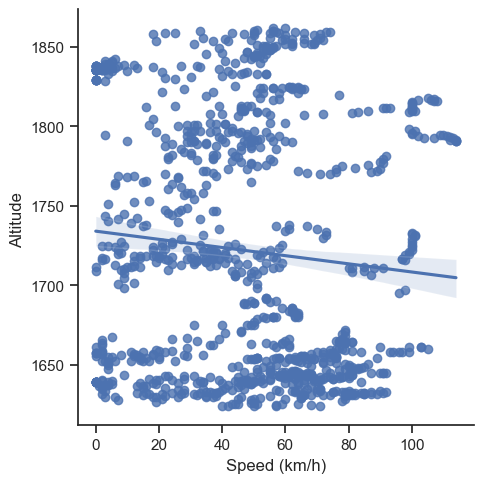

In [99]:
#draw a linear regression model to show the relationship between speed and altitude
sns.lmplot(x='Speed (km/h)', y='Altitude ', data=data)
plt.show()

# Create an SVM to predict the speed level at a give lon and lat combination

In [100]:
# make ans SVM model to predict the speed level at a give lon and lat combination
# get the data
X = data[['Lat ', 'Lon']]
y = data['Speed (Km/h)']
# remove rows with Nan
X = X.dropna()
y = y.dropna()
# make the sample [700,700]
X = X[:700]
y = y[:700]
# split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# import the SVM model
from sklearn.svm import SVC
# create an instance of the model
svm_model = SVC(kernel='linear')
# fit the model 
svm_model.fit(X_train, y_train)
# predict the speed level
y_pred = svm_model.predict(X_test)
# get the accuracy of the model
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm_model.score(X_test, y_test)))


KeyError: 'Speed (Km/h)'

In [ ]:
x = data.drop(["Reg. No.", 'Lat ','Lon','EngineState ','Change in Direction','GPSTime','GPS Signal Strength','Speed (km/h)','Speed (m/s)','Time '], axis=1)
#encoding the data to deal with categorical data
x = pd.get_dummies(x)
x

In [ ]:
# plot the SVM model and hyperplane
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
# 
plot_decision_regions(X.values, y.values, clf=svm_model, legend=2)
plt.show()


In [106]:
# make a decision tree model to predict the speed level at a give lon and lat combination
# get the data
X = data[['Lat ', 'Lon']]
y = data['Speed Level']
# remove rows with Nan
X = X.dropna()
y = y.dropna()
# make the sample [700,700]
X = X[:700]
y = y[:700]
# split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# import the decision tree model
from sklearn.tree import DecisionTreeClassifier
# create an instance of the model
tree_model = DecisionTreeClassifier()
# fit the model
tree_model.fit(X_train, y_train)
# predict the speed level
y_pred = tree_model.predict(X_test)
# get the accuracy of the model 
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(tree_model.score(X_test, y_test)))


Accuracy of decision tree classifier on test set: 0.81


C:\Users\Administrator\AppData\Local\Temp\ipykernel_24952\877605508.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y = y[:700]


In [ ]:
# test the model with a new data point
# new data point
new_data = [[-1.2921, 36.8219]]
# predict the speed level
tree_model.predict(new_data)


In [105]:
# make decision tree to predict the speed change based on the latitude and longitude
# get the data
X = data[['Lat ', 'Lon']]
y = data['Speed Change']
# replace null and empty values with 0
X = X.fillna(0)
y = y.fillna(0)
#set the categories first
X['Lat '] = X['Lat '].astype('category')
X['Lon'] = X['Lon'].astype('category')
# get the categories
X['Lat '] = X['Lat '].cat.codes
X['Lon'] = X['Lon'].cat.codes
# get the categories
y = y.cat.codes



# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# create the decision tree
dtree = DecisionTreeClassifier()
# train the decision tree
dtree.fit(X_train, y_train)
# predict the speed change
y_pred = dtree.predict(X_test)
# get the accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


TypeError: Cannot setitem on a Categorical with a new category (0), set the categories first

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [ ]:
# create time series data for the speed change and lon and lat combination
# get the data
X = data[['Lat ', 'Lon']]
y = data['Speed Change']
#categorical data of speed change into 1 if positive and 0 if negative
y = y.cat.codes

# replace null and empty values with 0
X = X.fillna(0)
y = y.fillna(0)
# limit the data to 700 rows
X = X[:700]
y = y[:700]
#set the categories first
X['Lat '] = X['Lat '].astype('category')
X['Lon'] = X['Lon'].astype('category')
# get the categories
X['Lat '] = X['Lat '].cat.codes
X['Lon'] = X['Lon'].cat.codes
# get the categories
y = y.cat.codes


In [ ]:
# Fitting the model to the training data
tree_model.fit(X_train,y_train)

In [ ]:
# Do prediction on test Data
y_pred = tree_model.predict(X_test)
print(y_pred)

In [ ]:
# Calculate accuracy
tree_model.score(X_test,y_test)

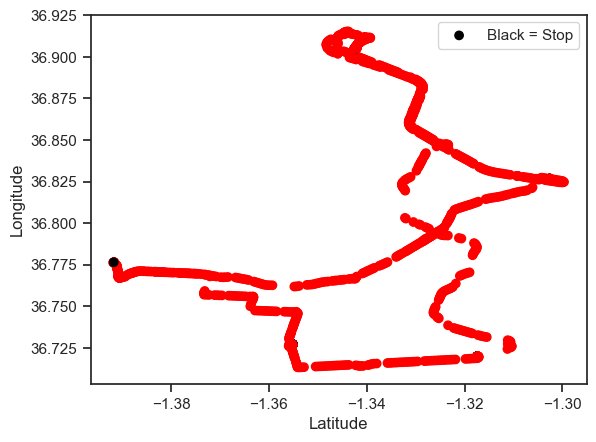

In [104]:
# cluster the stopping points where engine state is 0 and motion point engine state is not 0 using K-means clustering
# get the data
X = data[['Lat ', 'Lon']]
y = data['EngineState ']
# replace null and empty values with 0
X = X.fillna(0)
y = y.fillna(0)

# set two colors for the clusters black where engine state is 0 and white where engine state is not 0
colors = np.where(y == 0, 'black', 'red')
# plot EngineState
plt.scatter(X['Lat '], X['Lon'], c=colors)
# legend
plt.legend(['Black = Stop', 'red = Motion'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()




In [ ]:
#check unique values in the speed level column
data['Speed Level'].unique()

In [ ]:
# delete Nan values
data = data.dropna()
data['Speed Level'].unique()

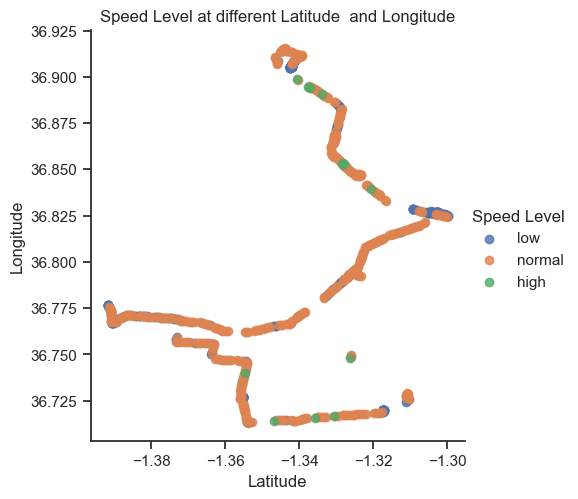

In [103]:
# plot lat and lon with speed level
sns.lmplot(x='Lat ', y='Lon', data=data, hue='Speed Level', fit_reg=False)
# add tittle 
plt.title('Speed Level at different Latitude  and Longitude')
# add x label
plt.xlabel('Latitude')
# add y label
plt.ylabel('Longitude')
# show the plot
plt.show()


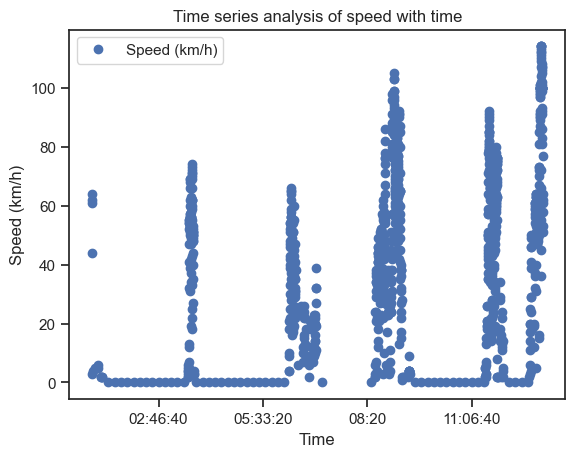

In [102]:
# make a time series analysis of the speed(Km/h)with time
# get the data
X = data[['exact_time', 'Speed (km/h)']]
# plot the data
X.plot(x='exact_time', y='Speed (km/h)', style='o')
# add title
plt.title('Time series analysis of speed with time')
# add x label
plt.xlabel('Time')
# add y label
plt.ylabel('Speed (km/h)')
# show the plot
plt.show()





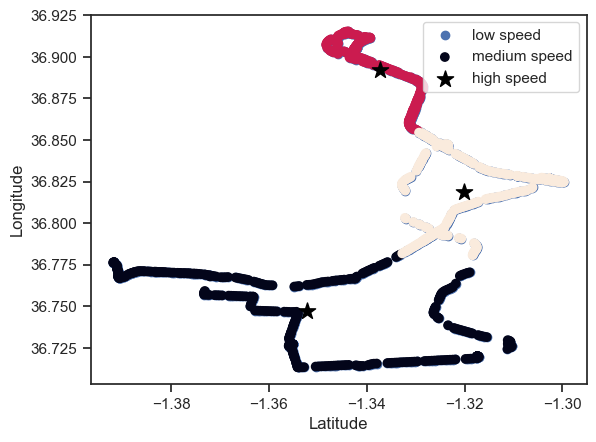

In [101]:
# cluster the speed level using K-means clustering
# import statements
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
# import KMeans
from sklearn.cluster import KMeans
# create blobs from speed Level data

# make axes lon and lat
X = data[['Lat ', 'Lon']]
plt.scatter(X['Lat '], X['Lon'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# create the KMeans model
kmeans = KMeans(n_clusters=3)
# fit the model
kmeans.fit(X)
# get the labels
labels = kmeans.predict(X)
# get the centroids
centroids = kmeans.cluster_centers_
# plot the clusters
plt.scatter(X['Lat '], X['Lon'], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=150)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
# add legend 
plt.legend(['low speed', 'medium speed', 'high speed', 'centroids'])

plt.show()
